In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from load_dataset import load_standardised_dataset
from image_standardisation import restore_standardised_image

In [2]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses, metrics
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

2023-01-24 19:21:30.745369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 19:21:31.507008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/garbarkozaurus/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-24 19:21:31.507028: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-24 19:21:33.244170: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7

In [3]:
np.random.seed(256)
path_to_dataset = Path("../SIDD_Small_sliced/Data/")
TRAIN_PAIRS_TO_LOAD = 1000
TEST_PAIRS_TO_LOAD = TRAIN_PAIRS_TO_LOAD//8
VAL_PAIRS_TO_LOAD = TRAIN_PAIRS_TO_LOAD//8
train_x, train_y, test_x, test_y, val_x, val_y = load_standardised_dataset(str(path_to_dataset), TRAIN_PAIRS_TO_LOAD, TEST_PAIRS_TO_LOAD, VAL_PAIRS_TO_LOAD)

In [4]:
convolutional_model = tf.keras.Sequential([
      layers.Input(shape=(256, 256, 3)),
      layers.Conv2D(16, (3, 3), activation='leaky_relu', padding='same'),
      layers.Conv2D(8, (3, 3), activation='leaky_relu', padding='same'),
      layers.Conv2D(4, (3, 3), activation='leaky_relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3, 3), activation="tanh", padding='same')])

2023-01-24 19:21:44.907416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-24 19:21:44.907569: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/garbarkozaurus/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-24 19:21:44.907644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/garbarkozaurus/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-24 19:21:44.907696: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loade

In [5]:
convolutional_model.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=["kullback_leibler_divergence", "MAE"])

In [6]:
convolutional_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 4)       292       
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 3)       111       
                                                                 
Total params: 2,011
Trainable params: 2,011
Non-trainable params: 0
_________________________________________________________________


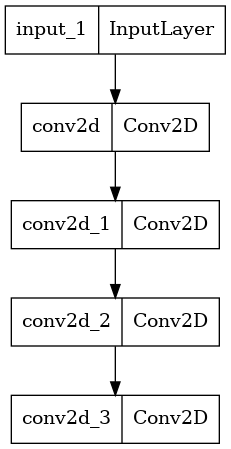

In [14]:
plot_model(convolutional_model)

In [7]:
early = EarlyStopping(patience=3, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='loss', patience=2)

In [8]:
convolutional_history = convolutional_model.fit(train_x, train_y,
                epochs=10,
                shuffle=True,
                validation_data=(val_x, val_y),
                callbacks=[early, reduce])

Epoch 1/10


2023-01-24 19:21:45.621082: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 786432000 exceeds 10% of free system memory.
2023-01-24 19:21:45.768444: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 786432000 exceeds 10% of free system memory.


32/32 [==============================] - 45s 1s/step - loss: 0.0710 - kullback_leibler_divergence: 0.6824 - MAE: 0.2086 - val_loss: 0.0296 - val_kullback_leibler_divergence: 0.1825 - val_MAE: 0.1376 - lr: 0.0010
Epoch 2/10
32/32 [==============================] - 44s 1s/step - loss: 0.0146 - kullback_leibler_divergence: 0.1460 - MAE: 0.0876 - val_loss: 0.0097 - val_kullback_leibler_divergence: 0.1668 - val_MAE: 0.0620 - lr: 0.0010
Epoch 3/10
32/32 [==============================] - 43s 1s/step - loss: 0.0060 - kullback_leibler_divergence: 0.0928 - MAE: 0.0514 - val_loss: 0.0067 - val_kullback_leibler_divergence: 0.1294 - val_MAE: 0.0525 - lr: 0.0010
Epoch 4/10
32/32 [==============================] - 44s 1s/step - loss: 0.0046 - kullback_leibler_divergence: 0.0617 - MAE: 0.0445 - val_loss: 0.0051 - val_kullback_leibler_divergence: 0.1064 - val_MAE: 0.0463 - lr: 0.0010
Epoch 5/10
32/32 [==============================] - 43s 1s/step - loss: 0.0038 - kullback_leibler_divergence: 0.0451 - 

In [9]:
convolutional_model.save("convolutional_model.h5")

In [10]:
convolutional_model.evaluate(test_x, test_y)

4/4 [==============================] - 2s 373ms/step - loss: 0.0019 - kullback_leibler_divergence: 0.0096 - MAE: 0.0288


[0.0019311296055093408, 0.00957526545971632, 0.028752993792295456]

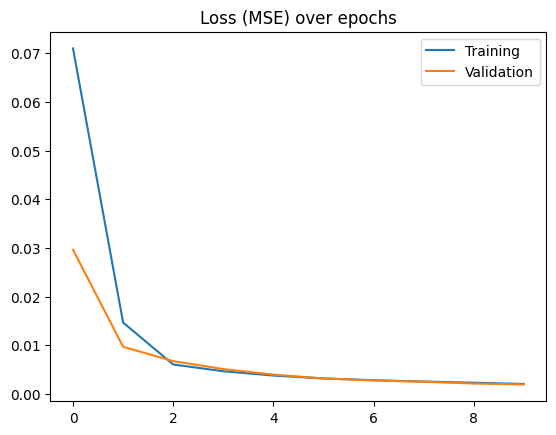

In [11]:
plt.plot(convolutional_history.history["loss"])
plt.plot(convolutional_history.history["val_loss"])
plt.legend(["Training", "Validation"])
plt.title("Loss (MSE) over epochs")
plt.show()

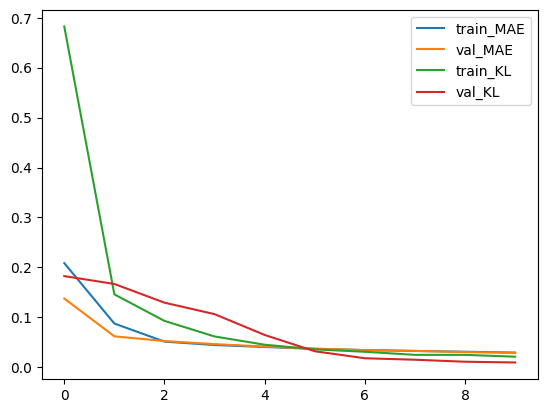

In [12]:
plt.plot(convolutional_history.history["MAE"])
plt.plot(convolutional_history.history["val_MAE"])
plt.plot(convolutional_history.history["kullback_leibler_divergence"])
plt.plot(convolutional_history.history["val_kullback_leibler_divergence"])
plt.legend(["train_MAE", "val_MAE", "train_KL", "val_KL"])
plt.show()

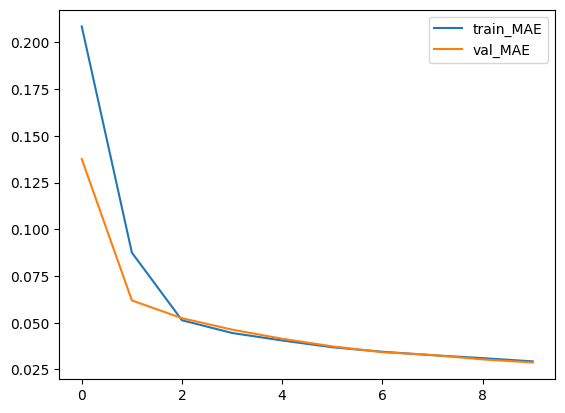

In [13]:
plt.plot(convolutional_history.history["MAE"])
plt.plot(convolutional_history.history["val_MAE"])
plt.legend(["train_MAE", "val_MAE"])
plt.show()

In [16]:
decoded_imgs = convolutional_model.predict(test_x)

4/4 [==============================] - 1s 316ms/step


In [17]:
rgb_decoded_imgs = np.array([restore_standardised_image(img) for img in decoded_imgs])

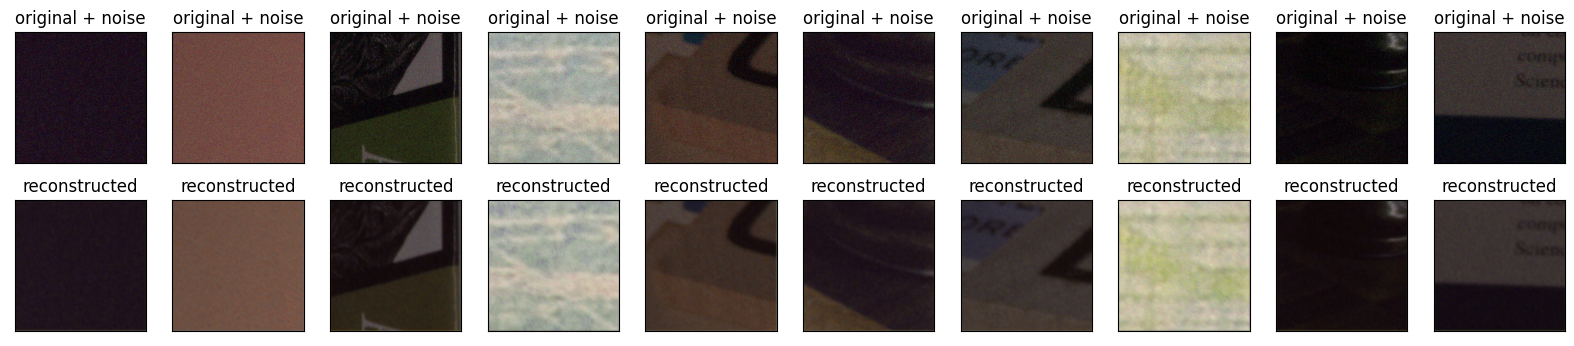

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(restore_standardised_image(test_x[i])))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(rgb_decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

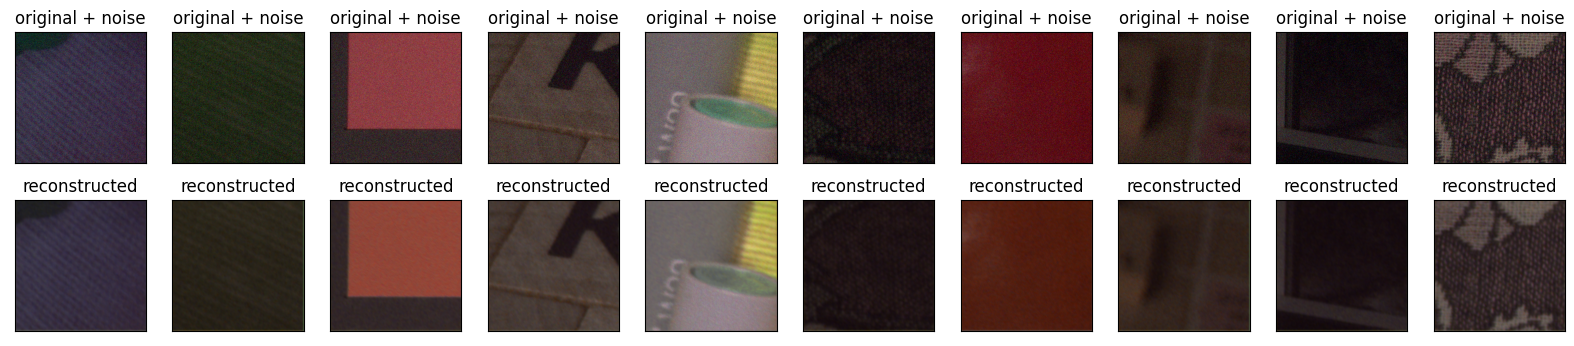

In [20]:
plt.figure(figsize=(20, 4))
for i in range(10, 20):
    # display original + noise
    ax = plt.subplot(2, n, i-10 + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(restore_standardised_image(test_x[i])))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i-10 + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(rgb_decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [21]:
import os
# Get file size in bytes for a given model
conv_bytes = os.stat('convolutional_model.h5').st_size
print(f"Convolutional model - size in memory: {conv_bytes} B = {conv_bytes/1024} KiB = {conv_bytes/1024**2} MiB = {conv_bytes/1024**3} GiB")

Convolutional model - size in memory: 66520 B = 64.9609375 KiB = 0.06343841552734375 MiB = 6.195157766342163e-05 GiB
